<a href="https://colab.research.google.com/github/javierm360/An-lisis-Oceanogr-fico-Bah-a-de-Saman-/blob/main/Proyecto_Final_OceanHackWeek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cartopy
import cartopy.feature as cfeature
!pip install regionmask

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 81.5 MB/s eta 0:00:00


In [2]:
!pip install cmocean

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 7.1 MB/s eta 0:00:00


In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cmocean
import numpy as np
import cmocean as cmo
import pandas as pd
import regionmask
import cartopy.crs as ccrs

In [17]:
data = xr.open_dataset('/content/cmems_mod_glo_phy_anfc_0.083deg_PT1H-m_1760198079272.nc')

In [18]:
data

<xarray.Dataset> Size: 5MB
Dimensions:    (time: 29712, depth: 1, latitude: 5, longitude: 4)
Coordinates:
  * time       (time) datetime64[ns] 238kB 2022-06-01 ... 2025-10-20T23:00:00
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 20B 19.0 19.08 19.17 19.25 19.33
  * longitude  (longitude) float32 16B -69.5 -69.42 -69.33 -69.25
Data variables:
    so         (time, depth, latitude, longitude) float32 2MB ...
    thetao     (time, depth, latitude, longitude) float32 2MB ...
Attributes:
    Conventions:       CF-1.11
    title:             hourly mean fields from Global Ocean Physics Analysis ...
    institution:       Mercator Ocean International
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    source:            MOI GLO12
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           https://marine.copernicus.eu/contact
    references:        http://marine.copernicus.eu
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  GLOBAL_ANALYSISFORECAST_PHY_001_024
    subset:datasetId:  cmems_mod_glo_phy_anfc_0.083deg_PT1H-m_202406
    subset:date:       2025-10-11T15:54:39.273Z

In [19]:
sst= data['thetao'][:]

In [20]:
print(sst)

<xarray.DataArray 'thetao' (time: 29712, depth: 1, latitude: 5, longitude: 4)> Size: 2MB
[594240 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 238kB 2022-06-01 ... 2025-10-20T23:00:00
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 20B 19.0 19.08 19.17 19.25 19.33
  * longitude  (longitude) float32 16B -69.5 -69.42 -69.33 -69.25
Attributes:
    units:          degrees_C
    standard_name:  sea_water_potential_temperature
    long_name:      Sea surface temperature
    cell_methods:   area: mean
    unit_long:      Degrees Celsius
    valid_max:      40.0
    valid_min:      -10.0


**Extraccion de Coordenadas**

In [21]:
lon = sst.longitude
lat= sst.latitude

**Extraccion de data para graficarla**

# **Graficar Area de la data**

**Remover la data que cae sobre tierra la tierra**

In [22]:
tierra= regionmask.defined_regions.natural_earth_v5_0_0.land_10.mask(lon, lat)
data_masked= data.where(tierra.isnull())

**Remover la data fuera de la Bahia**

In [23]:
lat_max = 19.2
bahia_samana = data_masked.sel(latitude=slice(None, lat_max))
lat= bahia_samana.latitude
lon = bahia_samana.longitude

**Elegir periodo a graficar**

In [24]:
sst_mean= sst.mean(dim=['latitude', 'longitude'], skipna= True)
fecha_temp_max= sst_mean.time[sst_mean.argmax(dim='time', skipna= True)].values

In [33]:
bahia_samana_sel = bahia_samana.sel(time=fecha_temp_max, method='nearest')
bahia_samana_sel= bahia_samana_sel['thetao'].squeeze()

In [43]:
bahia_samana_sel

<xarray.DataArray 'thetao' (latitude: 3, longitude: 4)> Size: 48B
array([[      nan,       nan,       nan,       nan],
       [      nan,       nan, 31.666862, 31.470266],
       [31.871077, 31.77138 , 31.671087, 31.398666]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 12B 19.0 19.08 19.17
  * longitude  (longitude) float32 16B -69.5 -69.42 -69.33 -69.25
    time       datetime64[ns] 8B 2023-10-16T19:00:00
    depth      float32 4B 0.494
Attributes:
    units:          degrees_C
    standard_name:  sea_water_potential_temperature
    long_name:      Sea surface temperature
    cell_methods:   area: mean
    unit_long:      Degrees Celsius
    valid_max:      40.0
    valid_min:      -10.0

In [45]:
print(bahia_samana_sel['time'])

<xarray.DataArray 'time' ()> Size: 8B
array('2023-10-16T19:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2023-10-16T19:00:00
    depth    float32 4B 0.494
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T


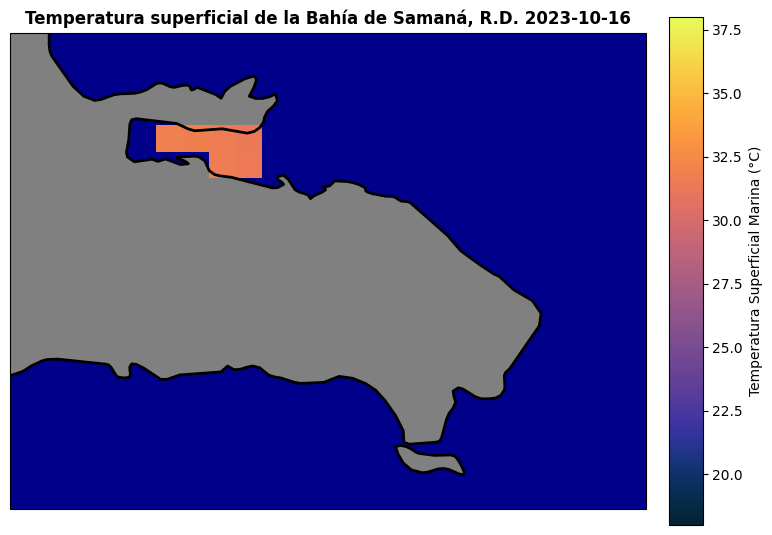

In [55]:
fig = plt.figure(figsize=(10,11))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
mesh = ax.pcolormesh(
    lon, lat, bahia_samana_sel,  # ahora es un NumPy 2D
    transform=ccrs.PlateCarree(),
    cmap=cmo.cm.thermal,
    vmin=18, vmax=38,
    shading='nearest'
)
ax.coastlines(resolution='10m', color='black', linewidth=2)
ax.add_feature(cfeature.LAND, facecolor='gray')
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.OCEAN, facecolor= 'darkblue')
ax.set_extent([-70.0, -68.0, 18.0, 19.5], crs=ccrs.PlateCarree())
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.03,
                    aspect=15, shrink=0.6)
cbar.set_label('Temperatura Superficial Marina (°C)')
ax.set_title('Temperatura superficial de la Bahía de Samaná, R.D. 2023-10-16', fontweight='bold')
pad = 30
plt.show()

# **Analisis Temporal de la Temperatura**

In [63]:
bahia_mean= bahia_samana.resample(time= '1M').mean

In [61]:
print(bahia_mean)

<bound method DatasetResampleAggregations.mean of <DatasetResample, grouped over 1 grouper(s), 41 groups in total:
    '__resample_dim__': TimeResampler('__resample_dim__'), 41/41 groups with labels 2022-06-30, ..., 2025-10-31>>


**Graficar Temperatura Promedio por Mes En La Bahia de Samana**

In [65]:
bahia_sst_mean= bahia_samana.mean(dim=['latitude', 'longitude'])

In [68]:
bahia_sst_mean

<xarray.Dataset> Size: 475kB
Dimensions:  (time: 29712, depth: 1)
Coordinates:
  * time     (time) datetime64[ns] 238kB 2022-06-01 ... 2025-10-20T23:00:00
  * depth    (depth) float32 4B 0.494
Data variables:
    so       (time, depth) float32 119kB 36.17 36.17 36.17 ... 36.38 36.38 36.38
    thetao   (time, depth) float32 119kB 28.53 28.52 28.5 ... 30.45 30.45 30.44

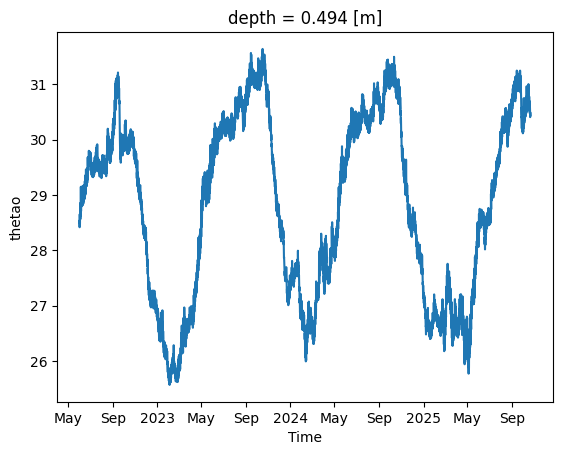

In [69]:
bahia_sst_mean['thetao'].plot()

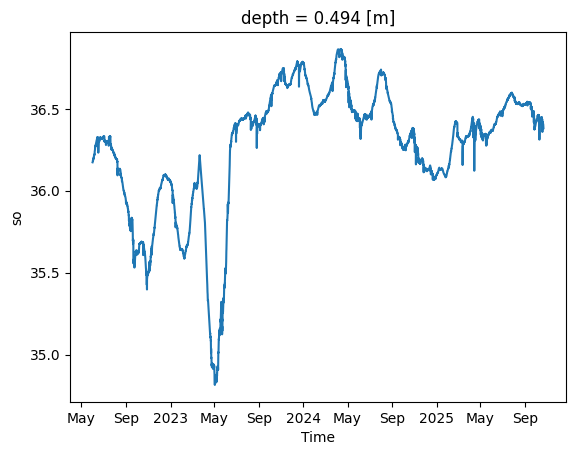

In [70]:
bahia_sst_mean['so'].plot()